<img height="150" src="https://i.postimg.cc/gjptBxF4/logo-gas-removebg-preview.png" width="350"/>

In [1]:
import os
import warnings
import matplotlib
%matplotlib inline
import pandas as pd

warnings.filterwarnings("ignore")

path = os.path.join(os.getcwd(), 'data', 'data_article.xlsx')
df = pd.read_excel(path, sheet_name="Dados_finais")

# Selecionando valores mínimos de SDG para cada estádio fenológico
df = df[['Cultivar', 'Rep', 'Estadio', 'SDG']]
df['min_SDG'] = df.groupby(['Cultivar', 'Rep', 'Estadio'])['SDG'].transform('min')

# Filtrando para manter apenas as linhas com os valores mínimos
df = df[df['SDG'] == df['min_SDG']].drop(columns=['min_SDG']).reset_index(drop=True)

# Verificando normalidade dos dados

In [2]:
import pingouin as pg

pg.normality(data=df,
             method='shapiro',
             alpha=0.05)

W          pval  normal
SDG  0.835744  1.862544e-32   False

In [3]:
pg.normality(data=df,
             method='shapiro',
             dv='SDG',
             group='Cultivar',
             alpha=0.05)

W      pval  normal
Cultivar                            
C1        0.816309  0.000002   False
C2        0.839465  0.000007   False
C3        0.811604  0.000001   False
C4        0.828529  0.000004   False
C5        0.814120  0.000002   False
C6        0.812305  0.000001   False
C7        0.814058  0.000002   False
C8        0.829119  0.000004   False
C9        0.829499  0.000005   False
C10       0.839189  0.000007   False
C11       0.819183  0.000002   False
C12       0.811692  0.000001   False
C13       0.835961  0.000006   False
C14       0.815382  0.000002   False
C15       0.814983  0.000002   False
C16       0.812732  0.000001   False
C17       0.855671  0.000019   False
C18       0.814350  0.000002   False
C19       0.846932  0.000011   False
C20       0.824155  0.000003   False
C21       0.821004  0.000002   False
C22       0.829647  0.000004   False

In [4]:
pg.homoscedasticity(df, method="levene", alpha=0.05, group="Estadio", dv='SDG')

W           pval  equal_var
levene  43.491679  2.878031e-105      False

# Graficamente

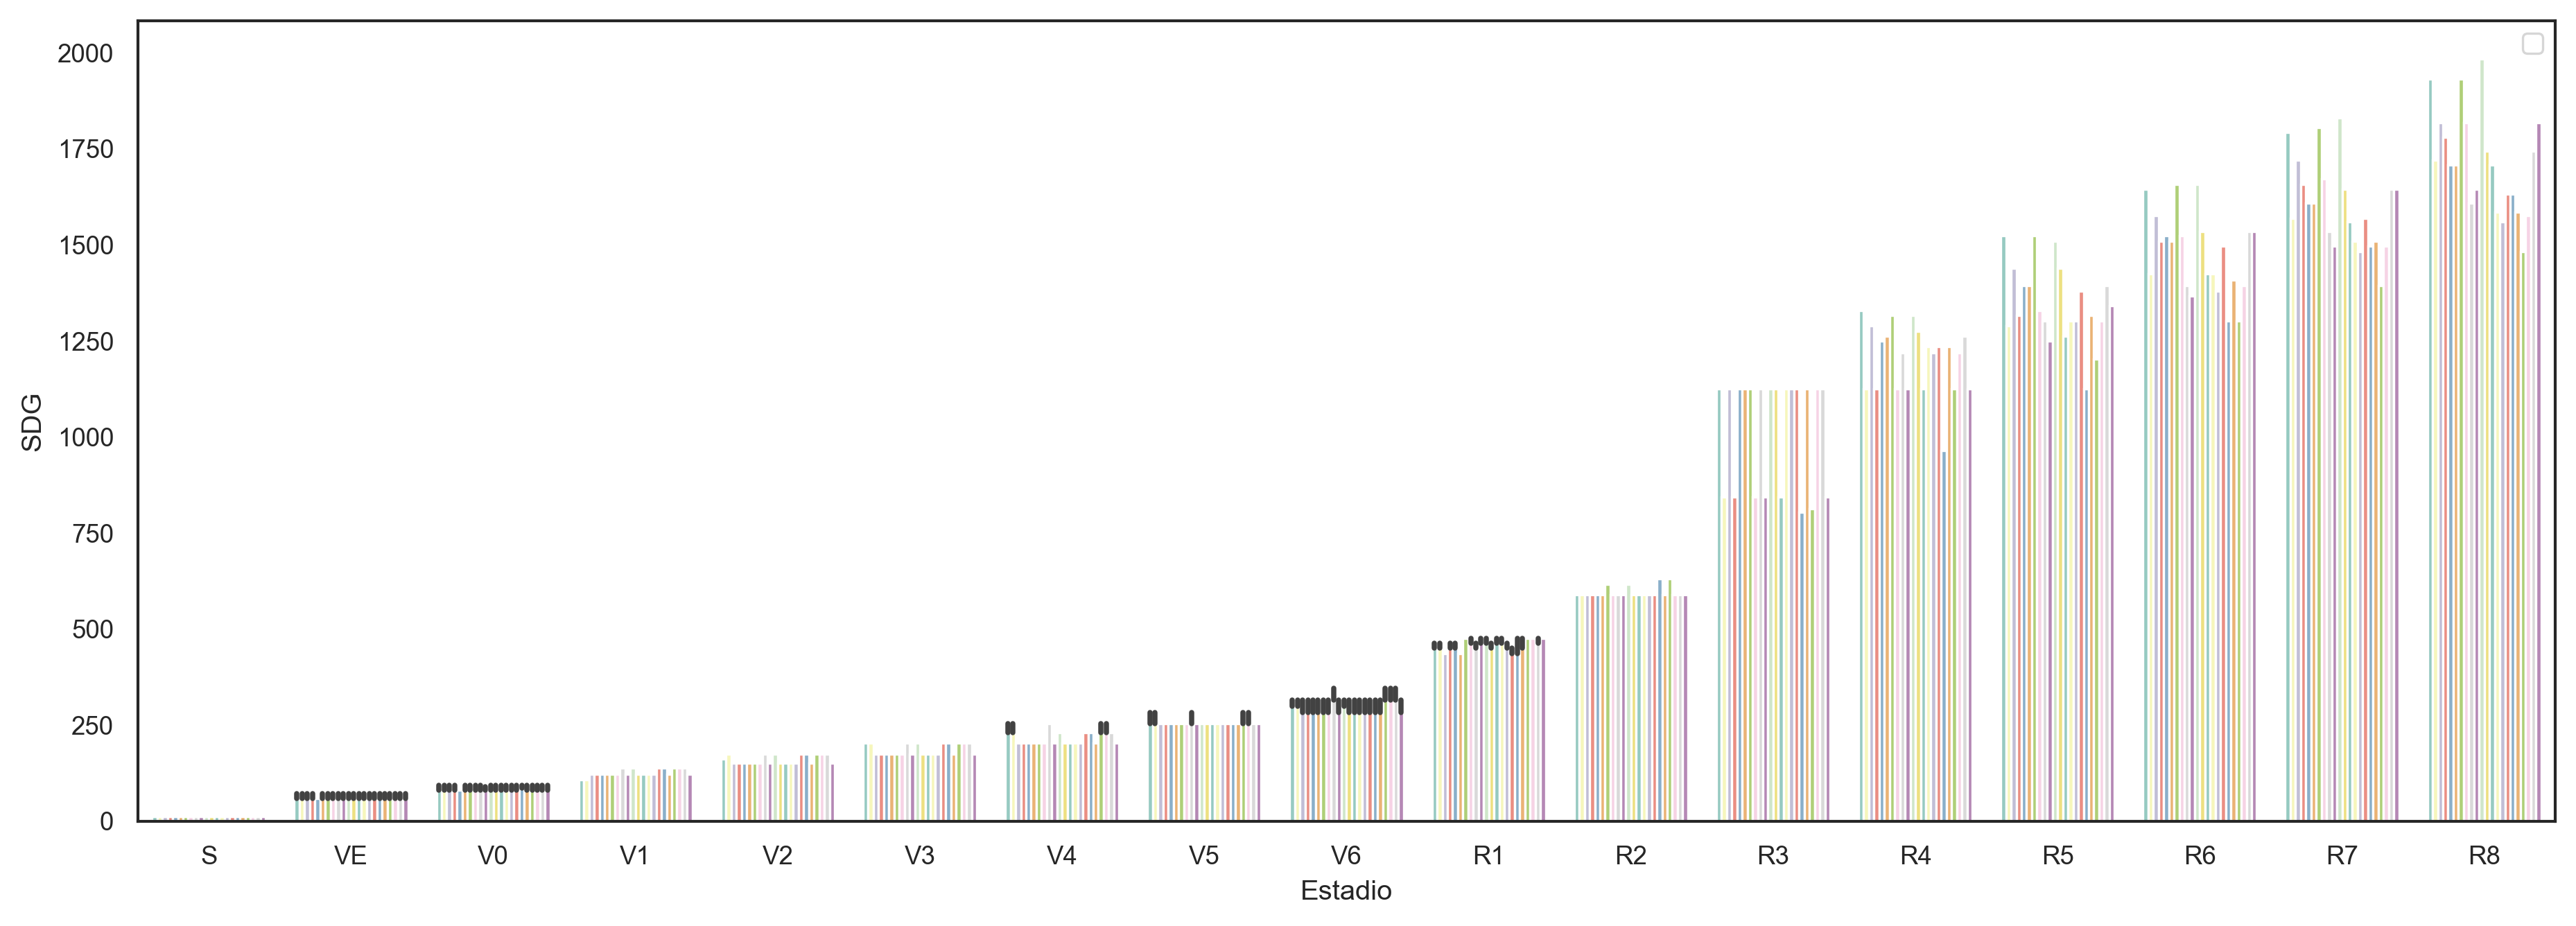

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5), dpi=300)

sns.set_theme(style='white', context="paper")

sns.barplot(df, y="SDG", x="Estadio", palette="Set3", hue='Cultivar')

plt.legend("")

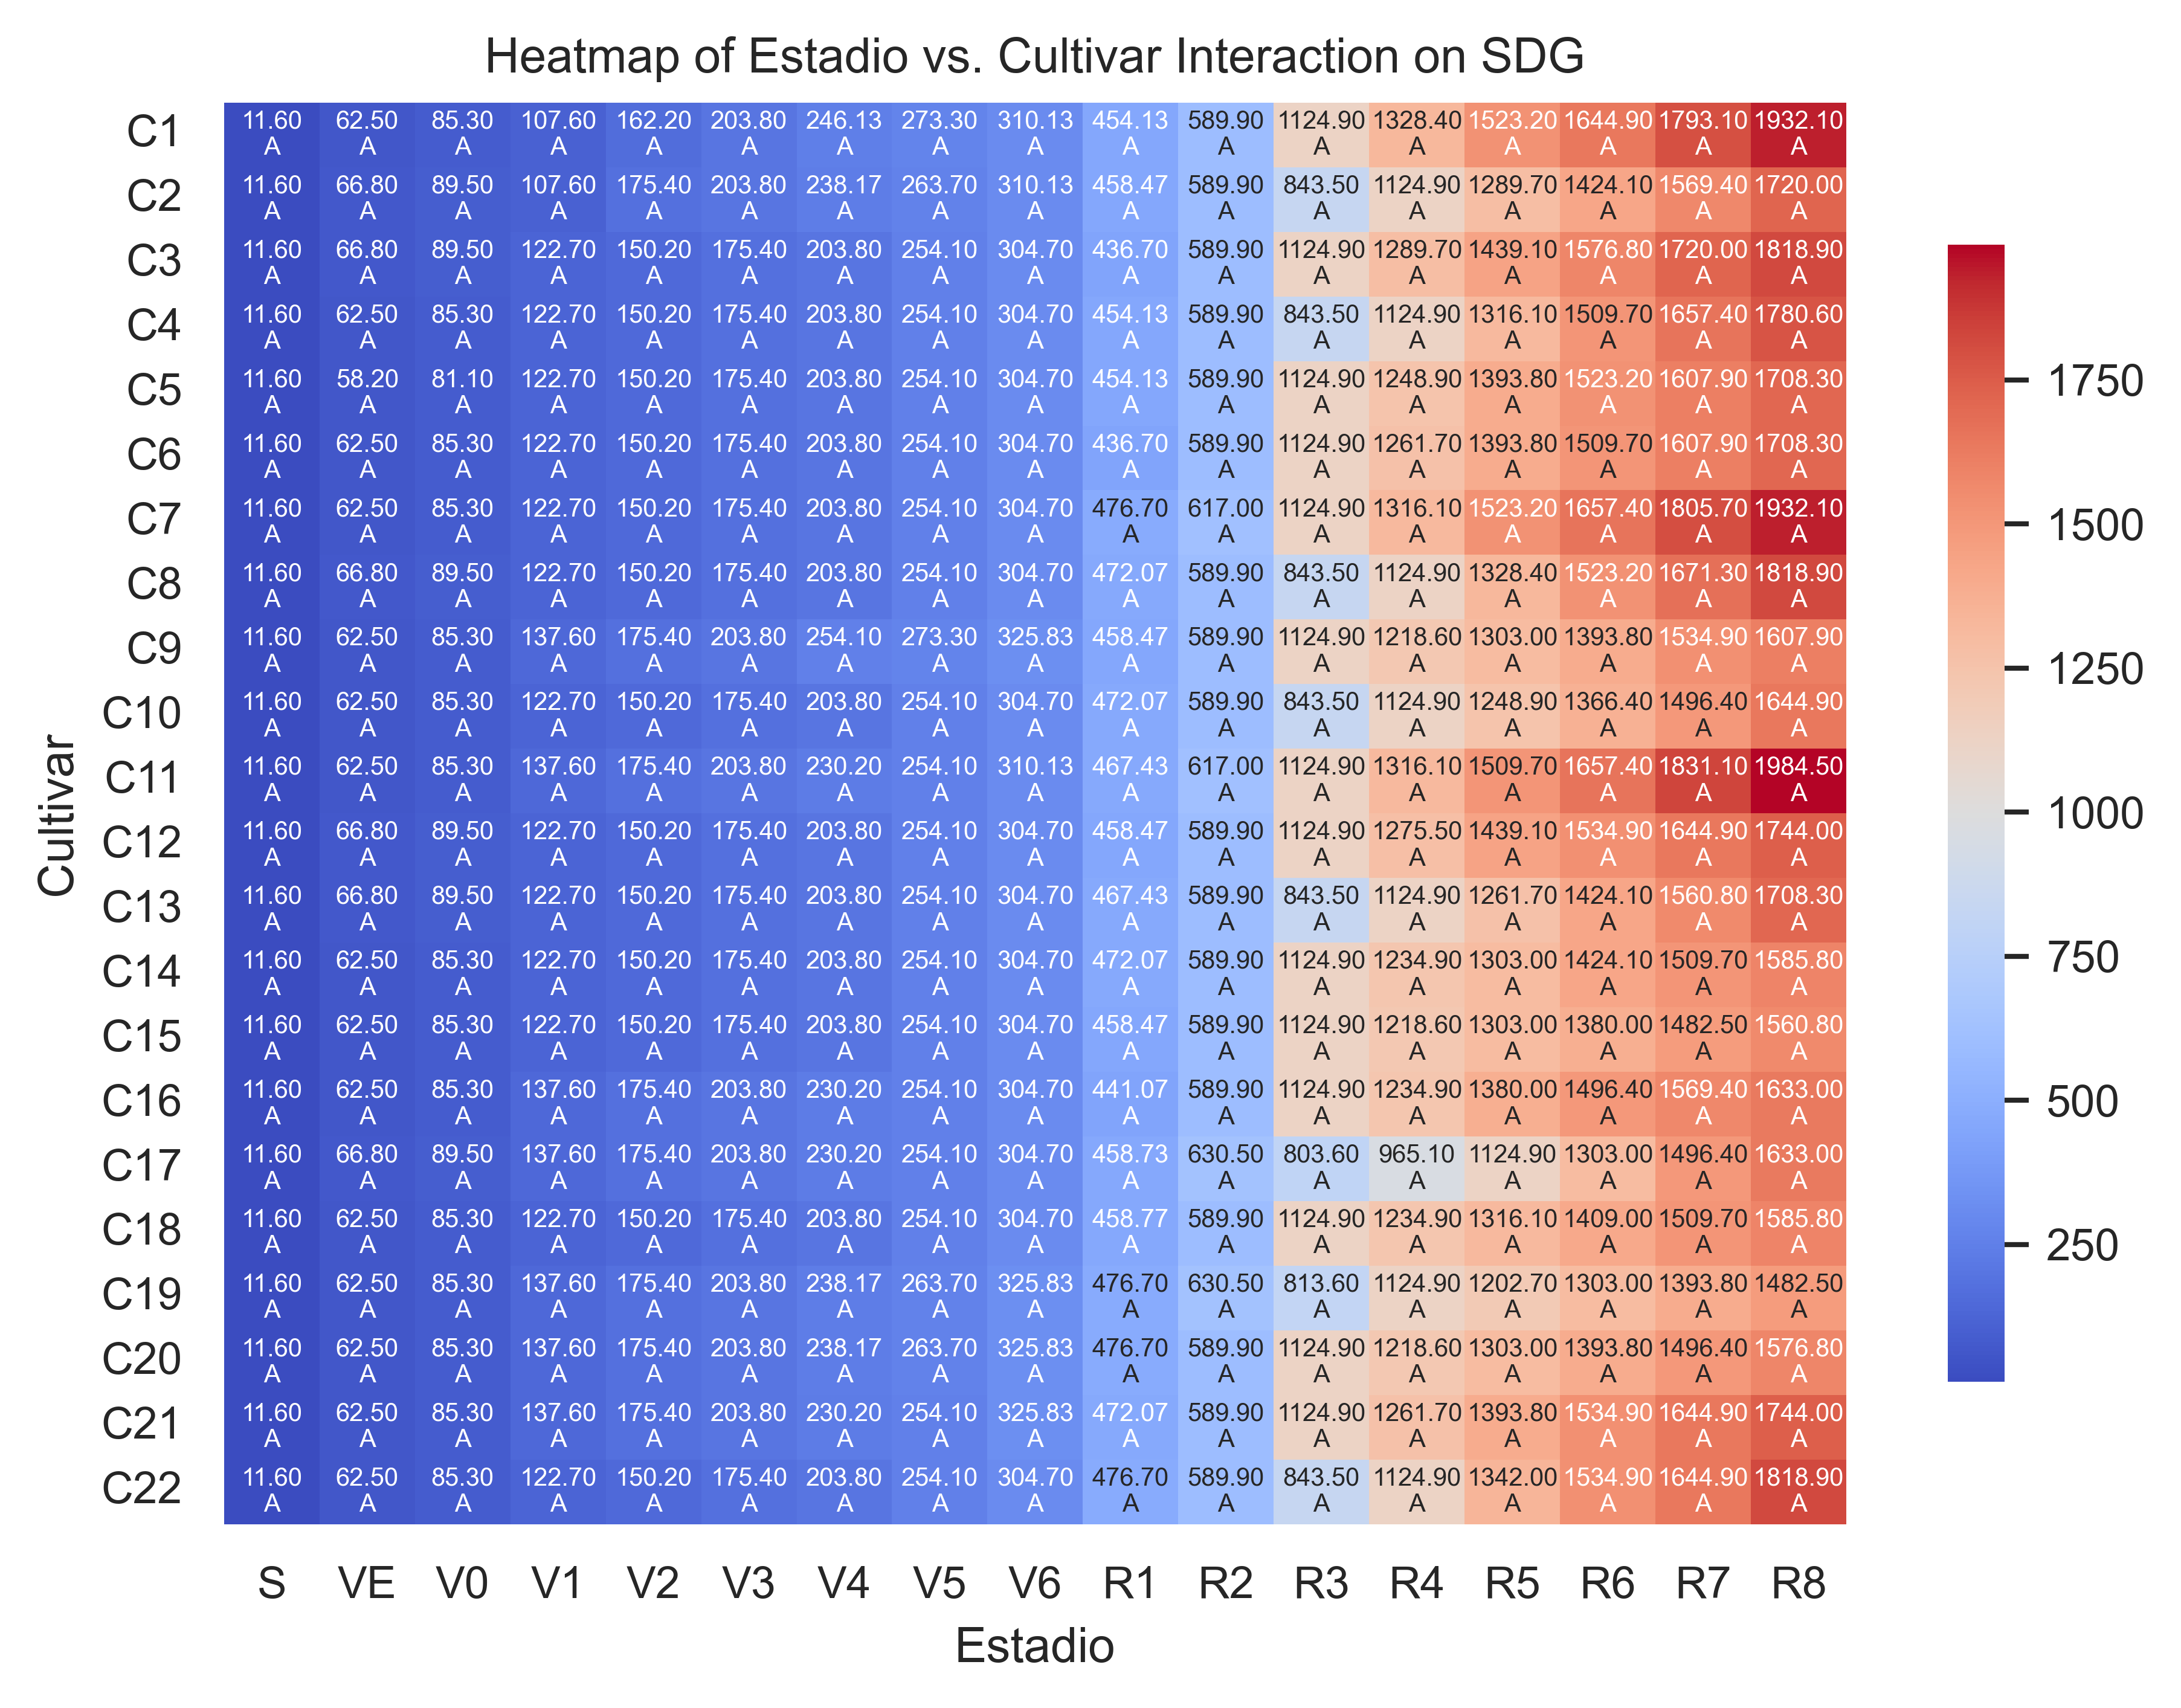

In [6]:
import matplotlib.pyplot as plt
import pingouin as pg
from util.methods import pt_heatmap_plot

# Post-hoc (Tukey)
group = "Cultivar"
group2 = "Estadio"
dv="SDG"

pt = pg.pairwise_tukey(data=df, dv=dv, between=group)
pt_heatmap_plot(pt, df, dv, group, group2)

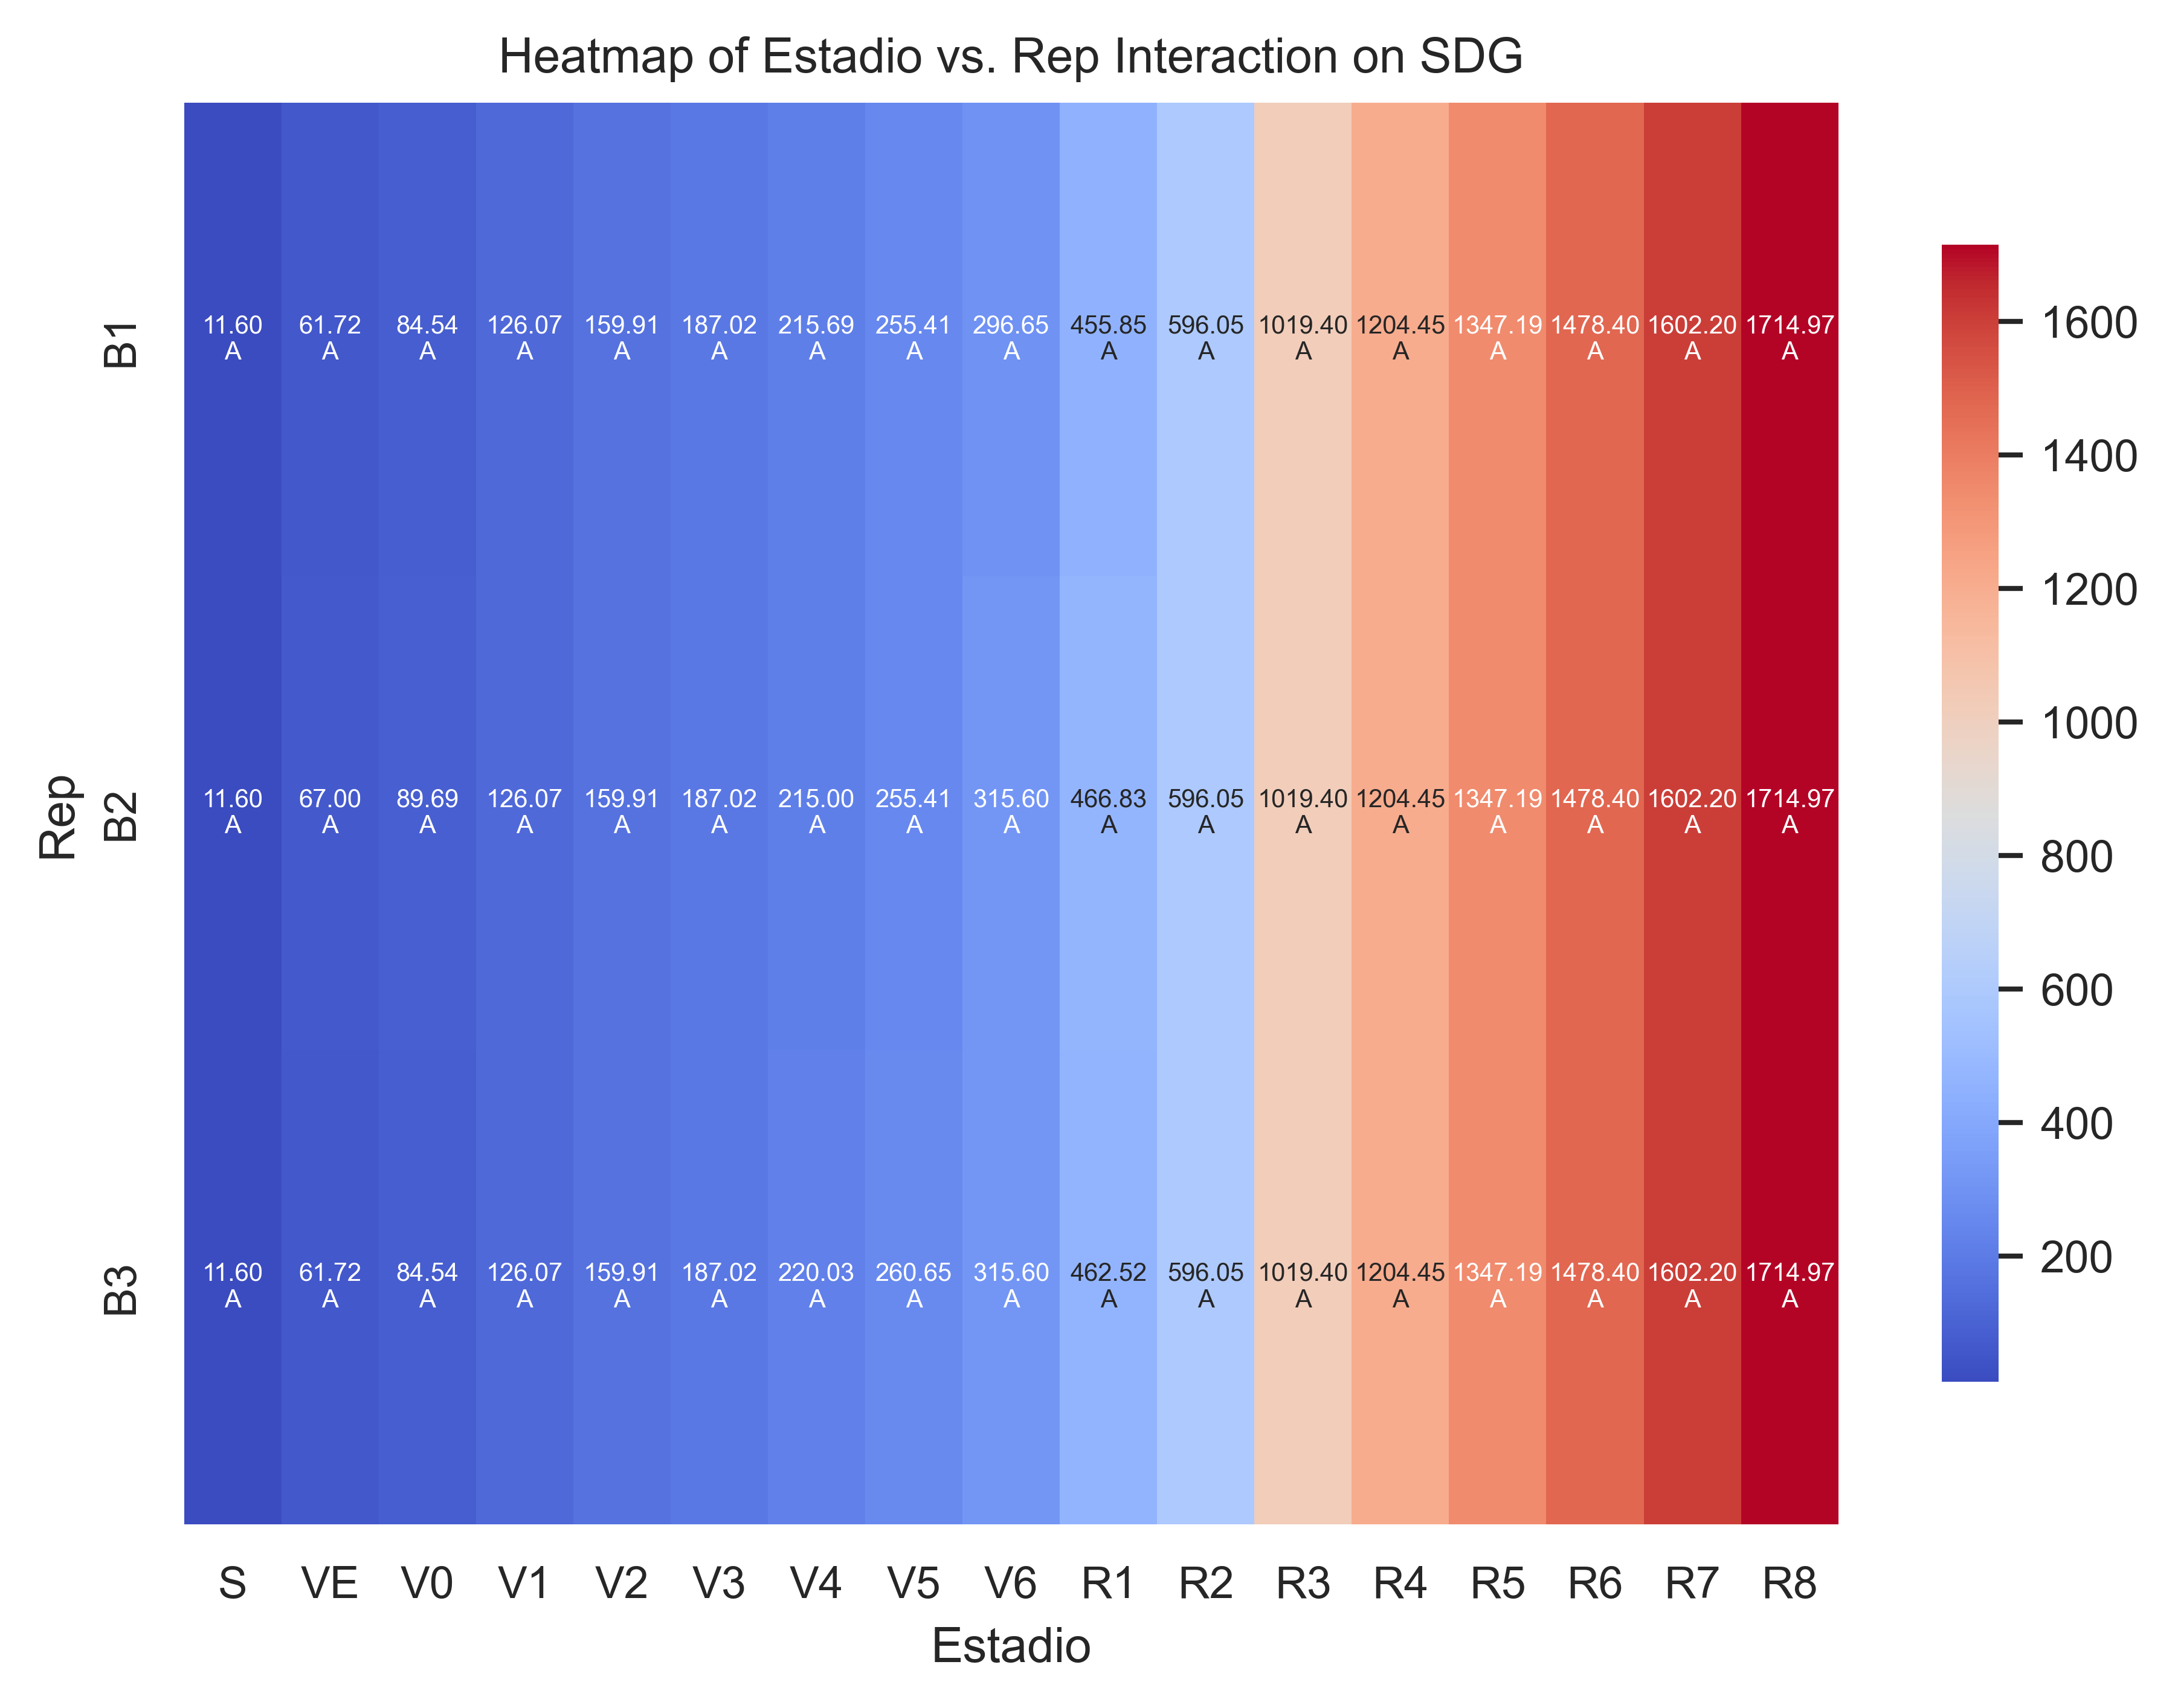

In [7]:
# Post-hoc (Tukey)
group = "Rep"
group2 = "Estadio"
dv="SDG"

pt = pg.pairwise_tukey(data=df, dv=dv, between=group)
pt_heatmap_plot(pt, df, dv, group, group2)

# S (teste)

In [8]:
S = df.loc[df['Estadio'] == 'S', :]
S.drop(columns=['Estadio'], inplace=True)

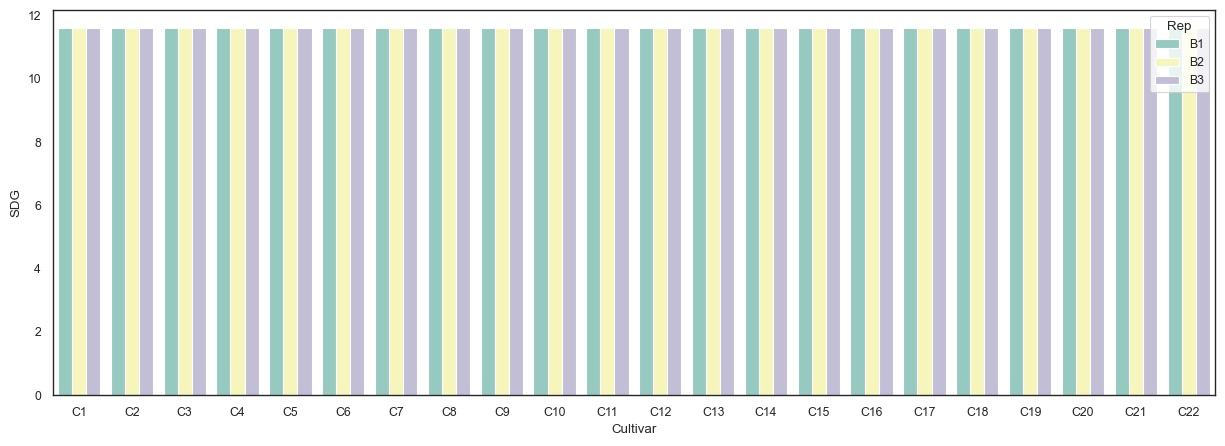

In [9]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=S, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [10]:
# Normalidade
pg.normality(S, method="shapiro", alpha=0.05)

W  pval  normal
SDG  1.0   1.0    True

In [11]:
# Homocedasticidade (Valores iguais = NaN)
pg.homoscedasticity(S, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [12]:
resultado = pg.anova(data=S, dv='SDG', between=['Cultivar',"Rep"], detailed=True).round(3) 
resultado['decisão'] = resultado['np2'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source   SS  DF   MS  np2     decisão
0        Cultivar  0.0  21  0.0  1.0  Aceitar H0
1             Rep  0.0   2  0.0  1.0  Aceitar H0
2  Cultivar * Rep -0.0  42 -0.0  1.0  Aceitar H0
3        Residual  0.0   0  NaN  NaN  Aceitar H0

In [13]:
# Coeficiente de Variação (%)
dados = S.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    0.0
dtype: float64


# VE

In [14]:
VE = df.loc[df['Estadio'] == 'VE', :]
VE.drop(columns=['Estadio'], inplace=True)

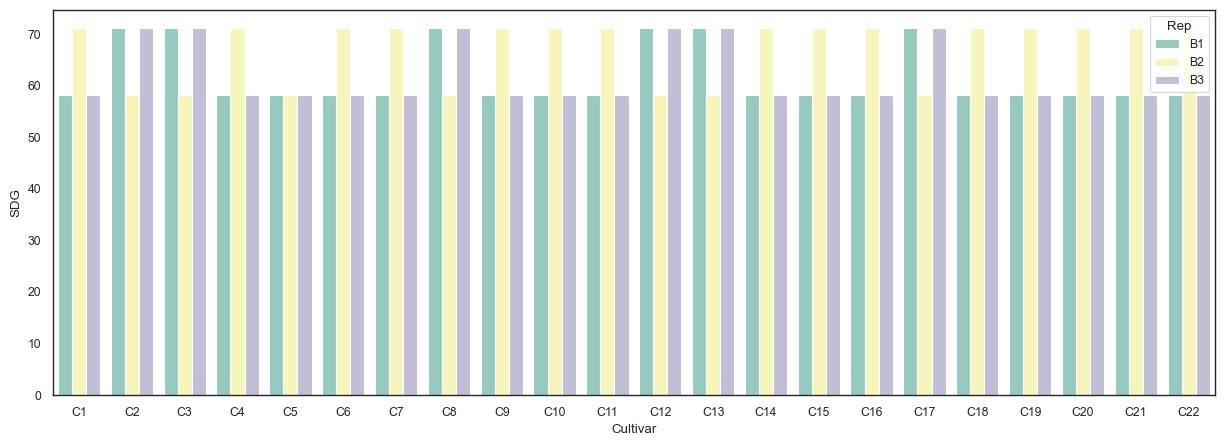

In [15]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=VE, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [16]:
# Normalidade
pg.normality(VE, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.624415  1.017628e-11   False

In [17]:
# Homocedasticidade
pg.homoscedasticity(VE, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene  0.047619   1.0       True

In [18]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=VE)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1         H     p-unc     decisão
Kruskal  Cultivar     21  7.962963  0.995299  Aceitar H0

In [19]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=VE)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal    Rep      2  10.0  0.006738  Rejeitar H0

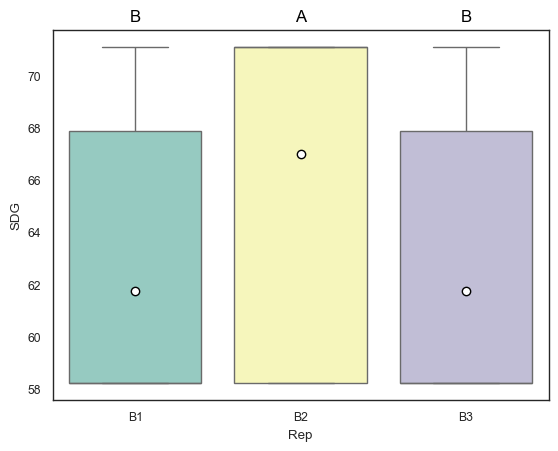

In [20]:
from util.ltukey import ltukey

# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=VE, dv='SDG', between='Rep')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
sns.boxplot(data=VE, x='Rep', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = VE.groupby('Rep')['SDG'].max().values
for i, rep in enumerate(VE['Rep'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [21]:
# Coeficiente de Variação (%)
dados = VE.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    10.07
dtype: float64


# V0

In [22]:
V0 = df.loc[df['Estadio'] == 'V0', :]
V0.drop(columns=['Estadio'], inplace=True)

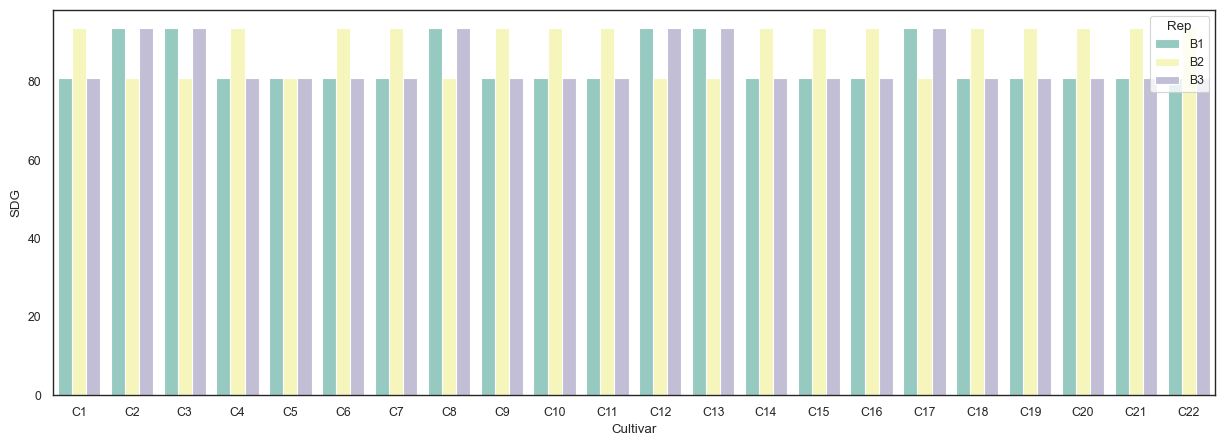

In [23]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=V0, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [24]:
# Normalidade
pg.normality(V0, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.624415  1.017628e-11   False

In [25]:
# Homocedasticidade
pg.homoscedasticity(V0, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene  0.047619   1.0       True

In [26]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=V0)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1         H     p-unc     decisão
Kruskal  Cultivar     21  7.962963  0.995299  Aceitar H0

In [27]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=V0)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal    Rep      2  10.0  0.006738  Rejeitar H0

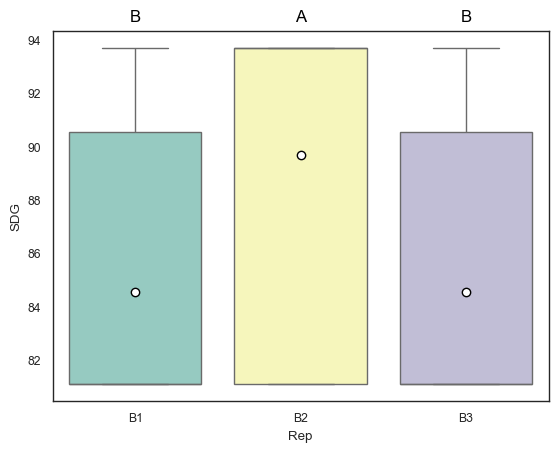

In [28]:
# Post-hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=V0, dv='SDG', between='Rep')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
sns.boxplot(data=V0, x='Rep', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = V0.groupby('Rep')['SDG'].max().values
for i, rep in enumerate(V0['Rep'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [29]:
# Coeficiente de Variação (%)
dados = V0.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    7.24
dtype: float64


# V1

In [30]:
V1 = df.loc[df['Estadio'] == 'V1', :]
V1.drop(columns=['Estadio'], inplace=True)

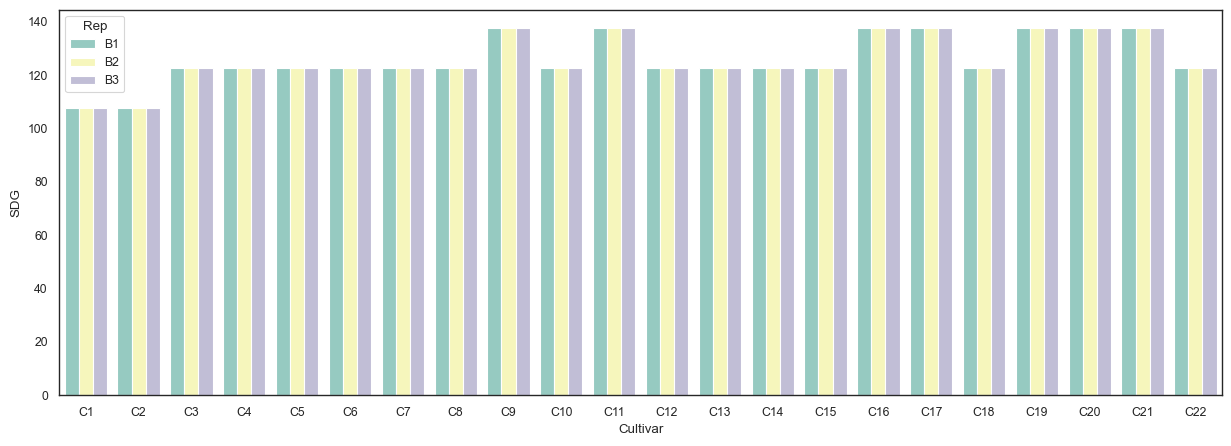

In [31]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=V1, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [32]:
# Normalidade
pg.normality(V1, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.758265  4.503061e-09   False

In [33]:
# Homocedasticidade
pg.homoscedasticity(V1, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [34]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=V1)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal  Cultivar     21  65.0  0.000002  Rejeitar H0

In [35]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=V1)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1             H  p-unc     decisão
Kruskal    Rep      2 -3.735369e-14    1.0  Aceitar H0

In [36]:
# Realizando média das repetições ("Rep")
V1 = V1.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

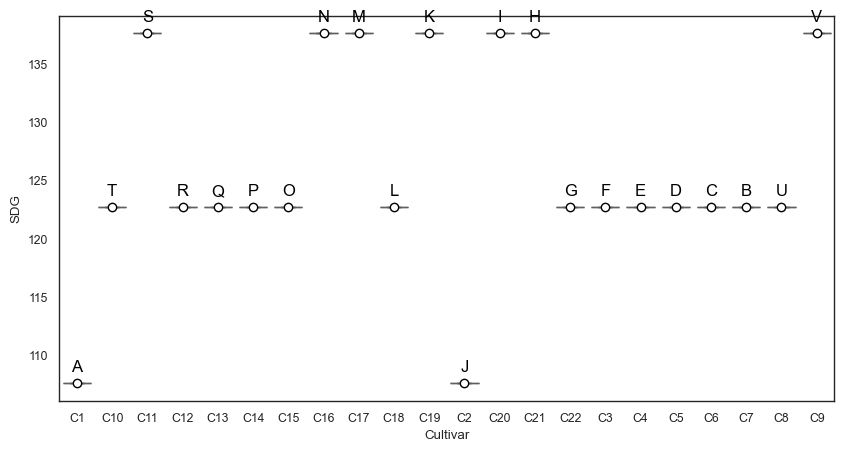

In [37]:
# Post-hoc (Games-Howell)
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=V1, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=V1, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = V1.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(V1['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [38]:
# Coeficiente de Variação (%)
dados = V1.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    7.26
dtype: float64


# V2

In [39]:
V2 = df.loc[df['Estadio'] == 'V2', :]
V2.drop(columns=['Estadio'], inplace=True)

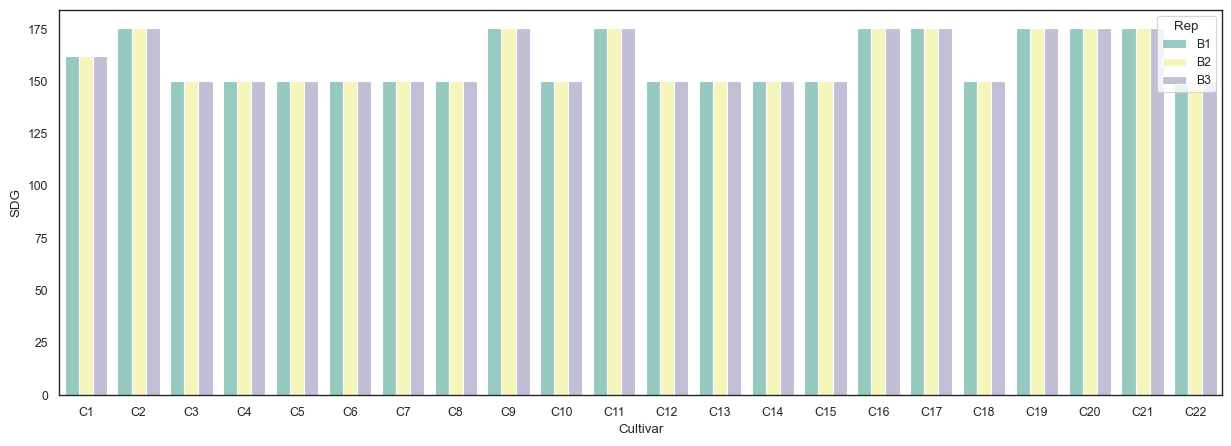

In [40]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=V2, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [41]:
# Normalidade
pg.normality(V2, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.645868  2.416375e-11   False

In [42]:
# Homocedasticidade
pg.homoscedasticity(V2, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [43]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=V2)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal  Cultivar     21  65.0  0.000002  Rejeitar H0

In [44]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=V2)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1             H  p-unc     decisão
Kruskal    Rep      2 -3.811601e-14    1.0  Aceitar H0

In [45]:
# Realizando média das repetições ("Rep")
V2 = V2.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

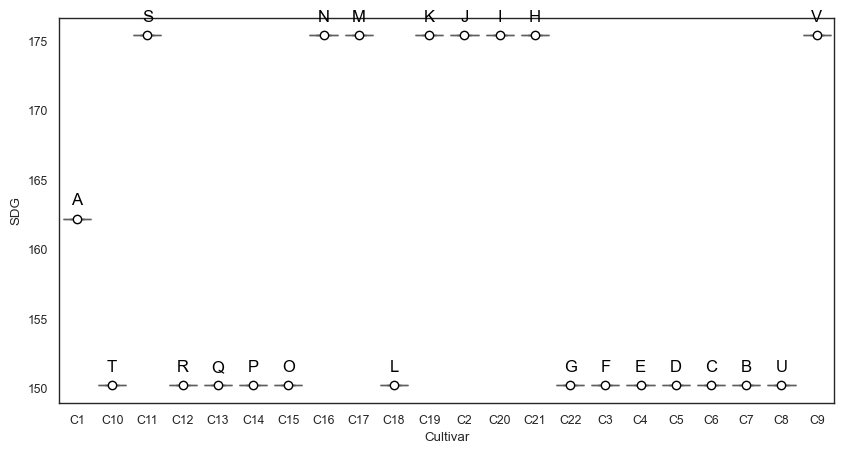

In [46]:
# Post-hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=V2, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=V2, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = V2.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(V2['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [47]:
# Coeficiente de Variação (%)
dados = V2.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    7.66
dtype: float64


# V3

In [48]:
V3 = df.loc[df['Estadio'] == 'V3', :]
V3.drop(columns=['Estadio'], inplace=True)

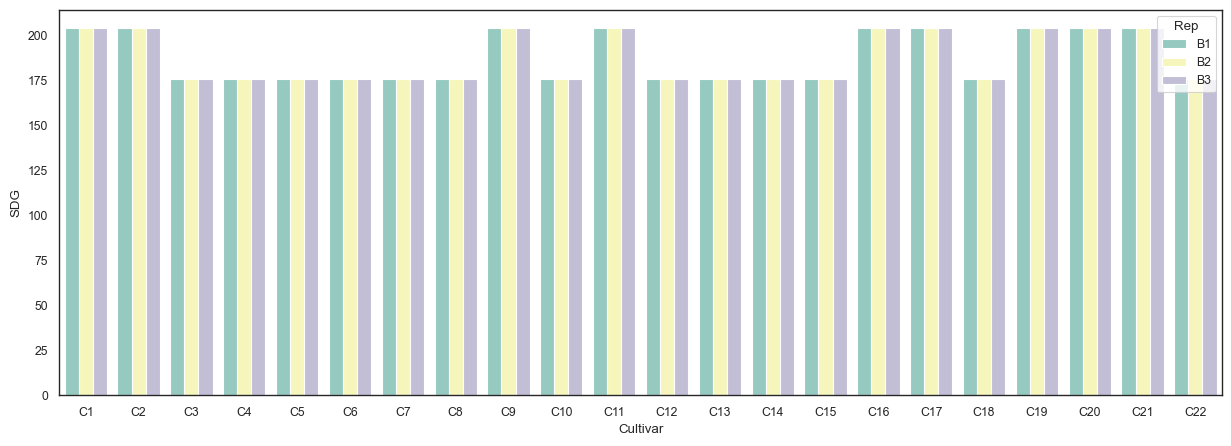

In [49]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=V3, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [50]:
# Normalidade
pg.normality(V3, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.624415  1.017628e-11   False

In [51]:
# Homocedasticidade
pg.homoscedasticity(V3, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [52]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=V3)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal  Cultivar     21  65.0  0.000002  Rejeitar H0

In [53]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=V3)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1             H  p-unc     decisão
Kruskal    Rep      2 -3.918219e-14    1.0  Aceitar H0

In [54]:
# Realizando média das repetições ("Rep")
V3 = V3.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

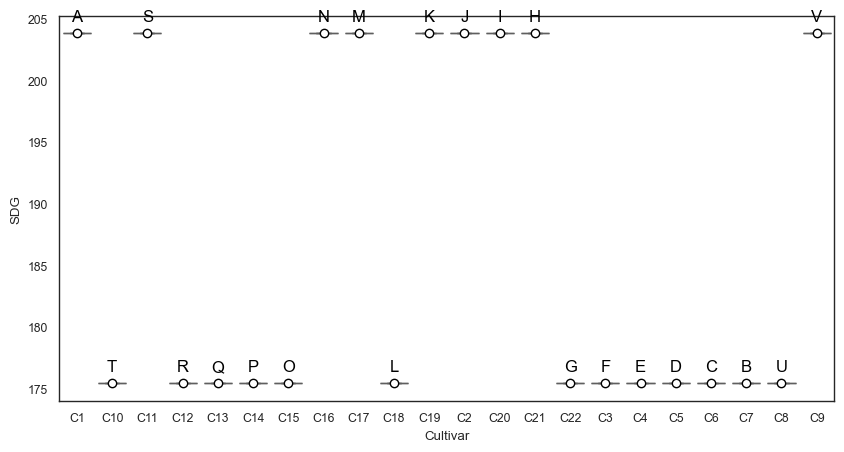

In [55]:
# Post-hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=V3, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=V3, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = V3.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(V3['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [56]:
# Coeficiente de Variação (%)
dados = V3.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    7.64
dtype: float64


# V4

In [57]:
V4 = df.loc[df['Estadio'] == 'V4', :]
V4.drop(columns=['Estadio'], inplace=True)

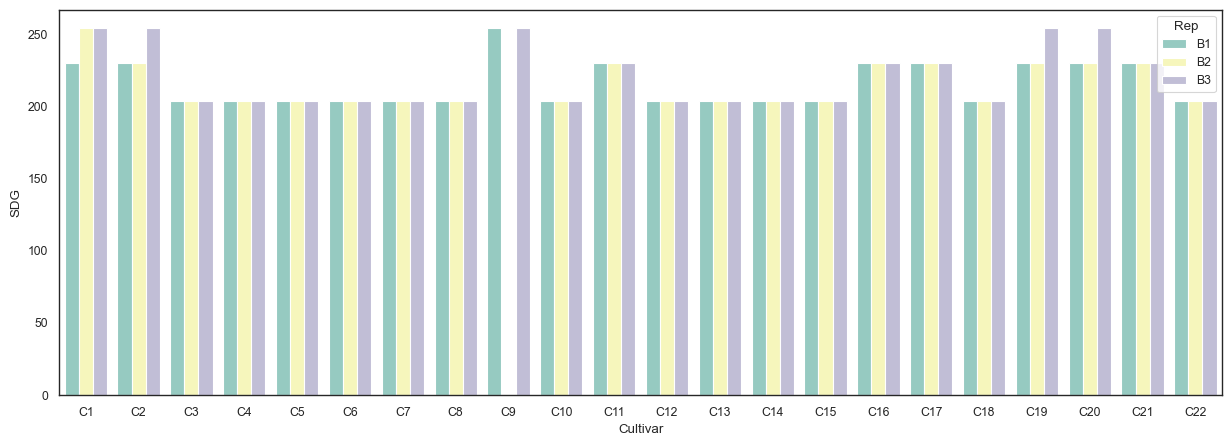

In [58]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=V4, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [59]:
# Normalidade
pg.normality(V4, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.704729  3.875674e-10   False

In [60]:
# Homocedasticidade
pg.homoscedasticity(V4, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W      pval  equal_var
levene  0.834799  0.665372       True

In [61]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=V4)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1          H     p-unc      decisão
Kruskal  Cultivar     21  62.336832  0.000006  Rejeitar H0

In [62]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=V4)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1        H     p-unc     decisão
Kruskal    Rep      2  0.43033  0.806408  Aceitar H0

In [63]:
# Realizando média das repetições ("Rep")
V4 = V4.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

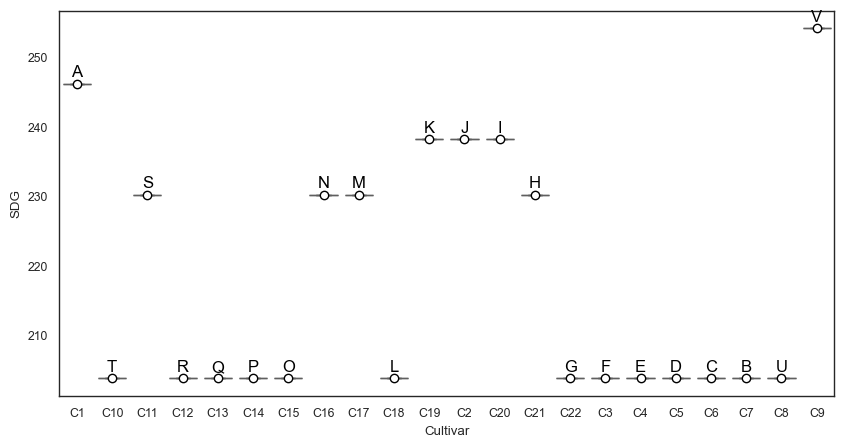

In [64]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=V4, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=V4, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = V4.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(V4['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [65]:
# Coeficiente de Variação (%)
dados = V4.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    8.11
dtype: float64


# V5

In [66]:
V5 = df.loc[df['Estadio'] == 'V5', :]

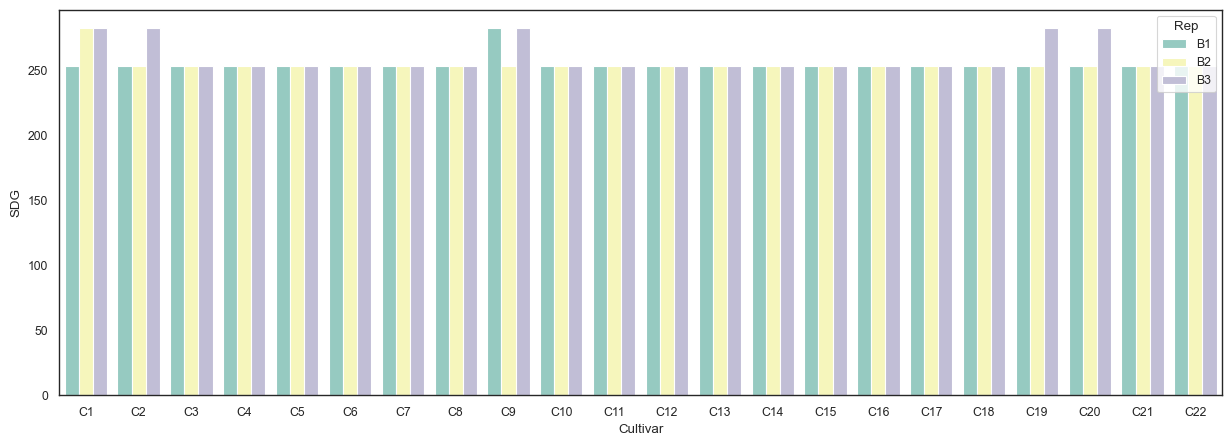

In [67]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=V5, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [68]:
# Normalidade
pg.normality(V5, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.354592  1.678592e-15   False

In [69]:
# Homocedasticidade
pg.homoscedasticity(V5, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W      pval  equal_var
levene  0.809524  0.693935       True

In [70]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=V5)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1          H     p-unc     decisão
Kruskal  Cultivar     21  30.375303  0.084702  Aceitar H0

In [71]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=V5)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1        H     p-unc     decisão
Kruskal    Rep      2  5.03632  0.080608  Aceitar H0

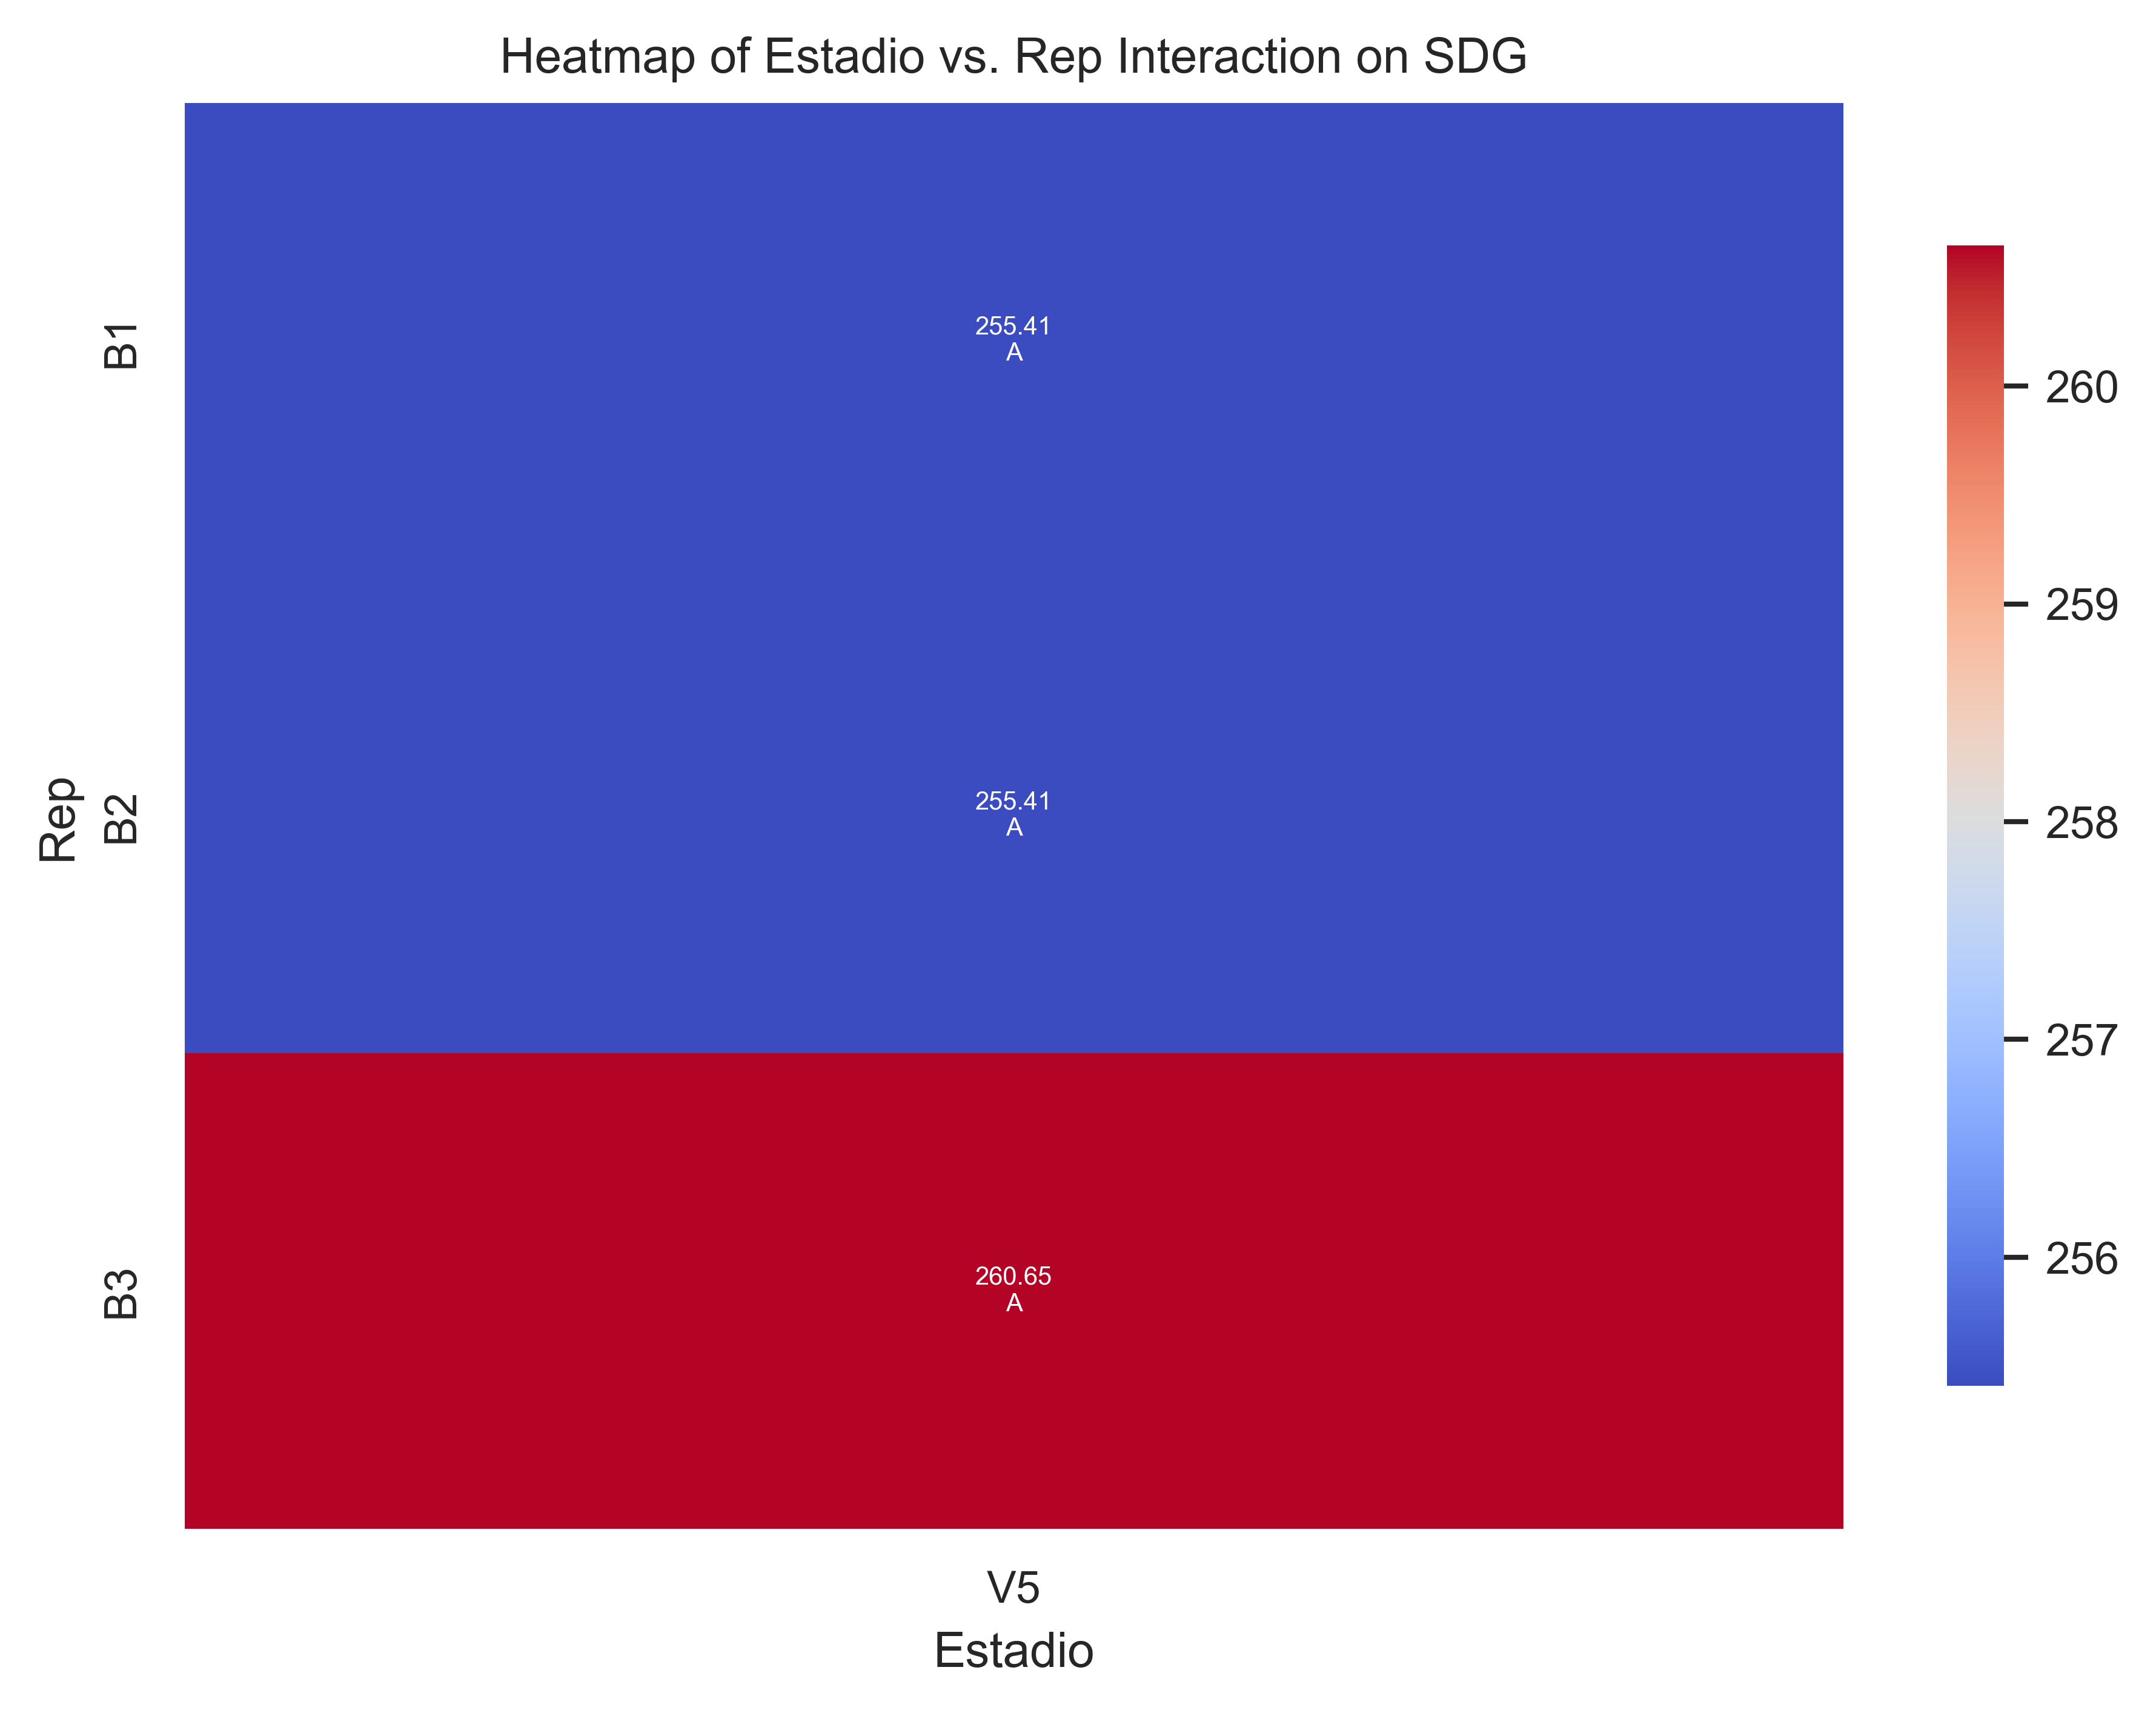

In [72]:
# Post-hoc (Tukey)
group = "Rep"
group2 = "Estadio"
dv="SDG"

pt = pg.pairwise_tukey(data=V5, dv=dv, between=group)
pt_heatmap_plot(pt, V5, dv, group, group2)

In [73]:
# Coeficiente de Variação (%)
dados = V5.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    3.47
dtype: float64


# V6

In [74]:
V6 = df.loc[df['Estadio'] == 'V6', :]
V6.drop(columns=['Estadio'], inplace=True)

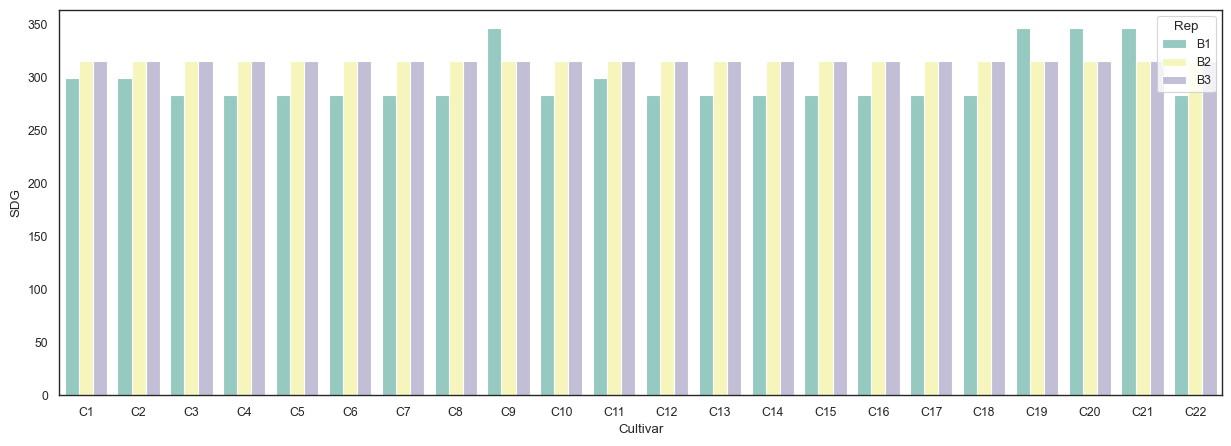

In [75]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=V6, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [76]:
# Normalidade
pg.normality(V6, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.726121  8.773120e-10   False

In [77]:
# Homocedasticidade
pg.homoscedasticity(V6, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene  0.033838   1.0       True

In [78]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=V6)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1          H    p-unc     decisão
Kruskal  Cultivar     21  13.209469  0.90111  Aceitar H0

In [79]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=V6)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1          H     p-unc      decisão
Kruskal    Rep      2  25.371594  0.000003  Rejeitar H0

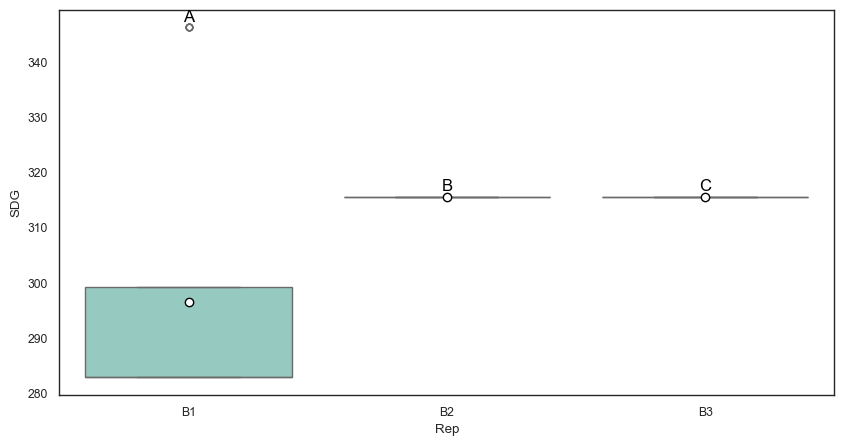

In [80]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=V6, dv='SDG', between='Rep')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=V6, x='Rep', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = V6.groupby('Rep')['SDG'].max().values
for i, rep in enumerate(V6['Rep'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [81]:
# Coeficiente de Variação (%)
dados = V6.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    5.38
dtype: float64


# R1

In [82]:
R1 = df.loc[df['Estadio'] == 'R1', :]
R1.drop(columns=['Estadio'], inplace=True)

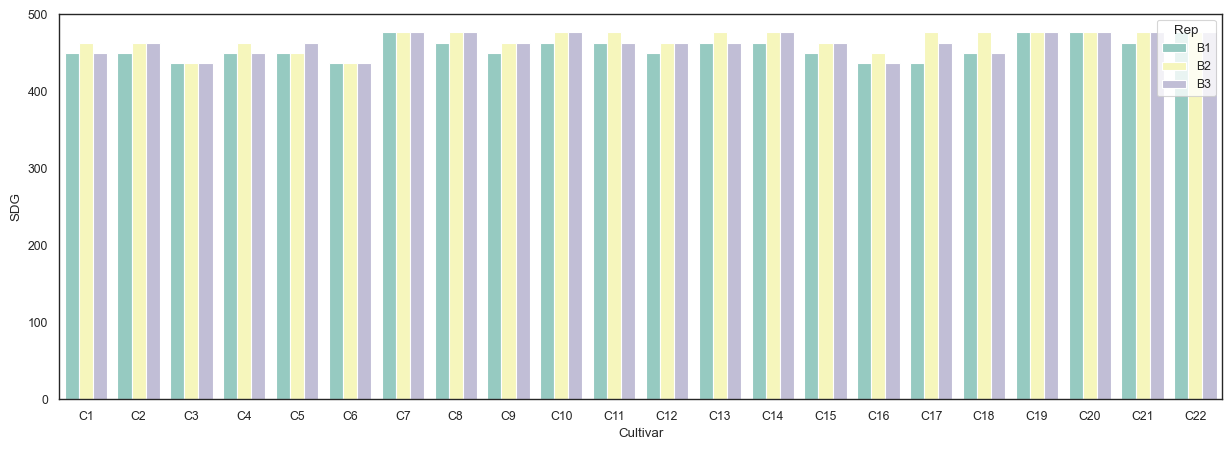

In [83]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=R1, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [84]:
# Normalidade
pg.normality(R1, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.840157  6.113103e-07   False

In [85]:
# Homocedasticidade
pg.homoscedasticity(R1, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W      pval  equal_var
levene  0.529716  0.941194       True

In [86]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=R1)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1          H     p-unc      decisão
Kruskal  Cultivar     21  48.656117  0.000559  Rejeitar H0

In [87]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=R1)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1         H     p-unc      decisão
Kruskal    Rep      2  7.445365  0.024169  Rejeitar H0

In [88]:
# Checando a interação Cultivar x Rep
R1['interacao'] = R1['Cultivar'] + R1['Rep']
resultado = pg.kruskal(dv='SDG', between="interacao", data=R1)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H    p-unc     decisão
Kruskal  interacao     65  65.0  0.47667  Aceitar H0

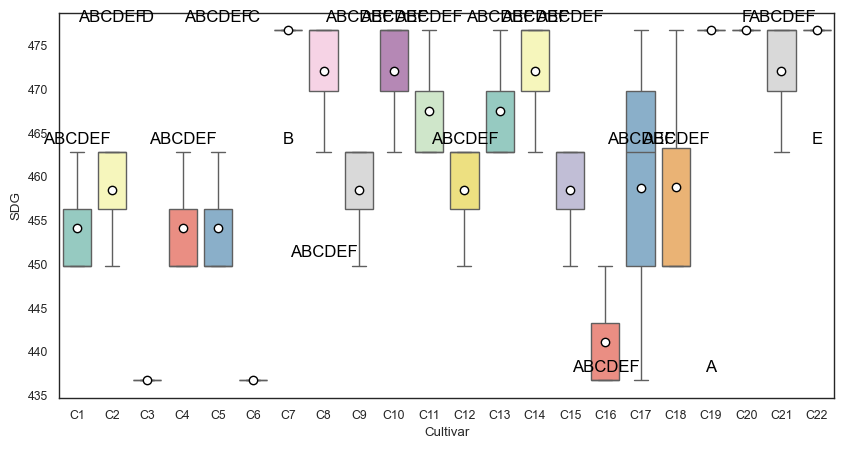

In [89]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=R1, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=R1, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = R1.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(R1['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

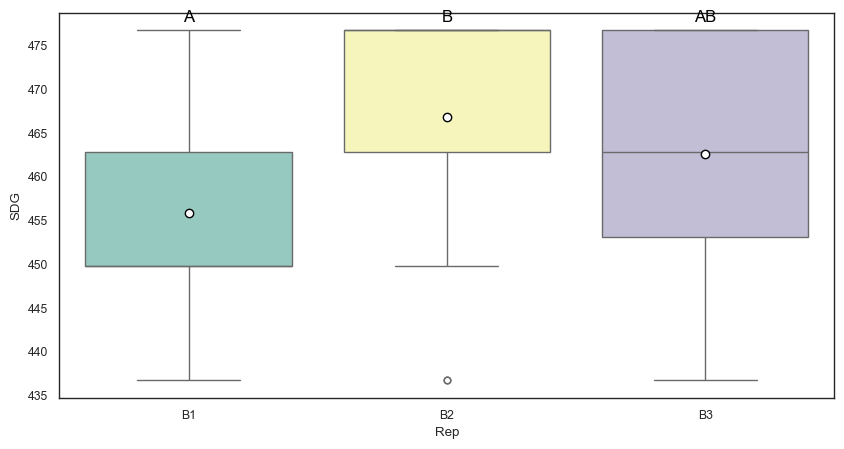

In [90]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=R1, dv='SDG', between='Rep')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=R1, x='Rep', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = R1.groupby('Rep')['SDG'].max().values
for i, rep in enumerate(R1['Rep'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [91]:
# Coeficiente de Variação (%)
dados = R1.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    3.05
dtype: float64


# R2

In [92]:
R2 = df.loc[df['Estadio'] == 'R2', :]
R2.drop(columns=['Estadio'], inplace=True)

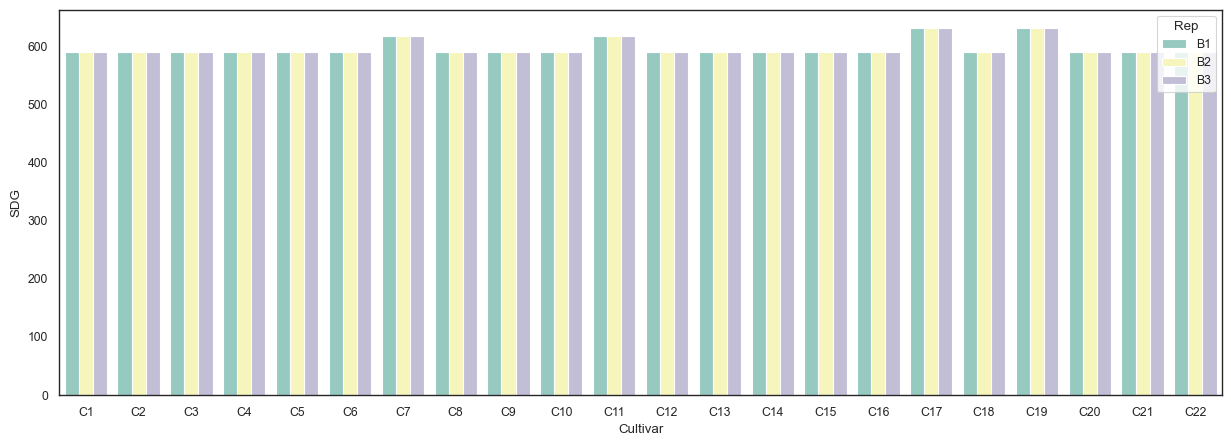

In [93]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=R2, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [94]:
# Normalidade
pg.normality(R2, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.491119  9.075707e-14   False

In [95]:
# Homocedasticidade
pg.homoscedasticity(R2, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [96]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=R2)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal  Cultivar     21  65.0  0.000002  Rejeitar H0

In [97]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=R2)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1             H  p-unc     decisão
Kruskal    Rep      2 -6.303435e-14    1.0  Aceitar H0

In [98]:
# Realizando média das repetições ("Rep")
R2 = R2.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

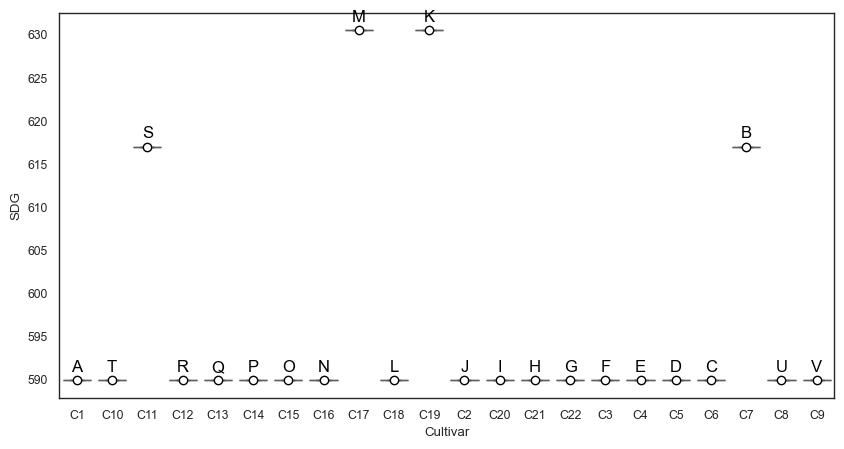

In [99]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=R2, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=R2, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = R2.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(R2['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [100]:
# Coeficiente de Variação (%)
dados = R2.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    2.3
dtype: float64


# R3

In [101]:
R3 = df.loc[df['Estadio'] == 'R3', :]
R3.drop(columns=['Estadio'], inplace=True)

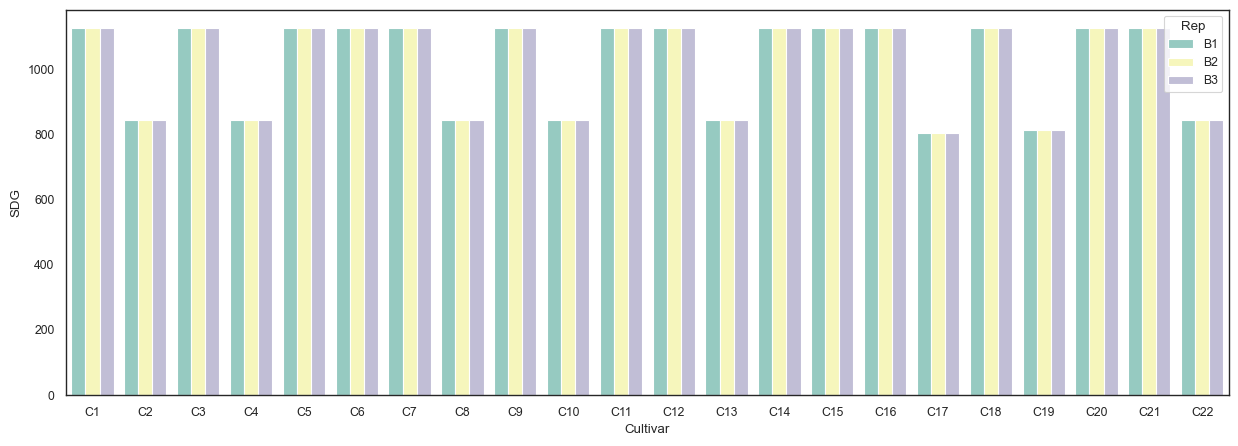

In [102]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=R3, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [103]:
# Normalidade
pg.normality(R3, method="shapiro", alpha=0.05)

W          pval  normal
SDG  0.635407  1.578065e-11   False

In [104]:
# Homocedasticidade
pg.homoscedasticity(R3, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [105]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=R3)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal  Cultivar     21  65.0  0.000002  Rejeitar H0

In [106]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=R3)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1             H  p-unc     decisão
Kruskal    Rep      2 -3.936572e-14    1.0  Aceitar H0

In [107]:
# Realizando média das repetições ("Rep")
R3 = R3.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

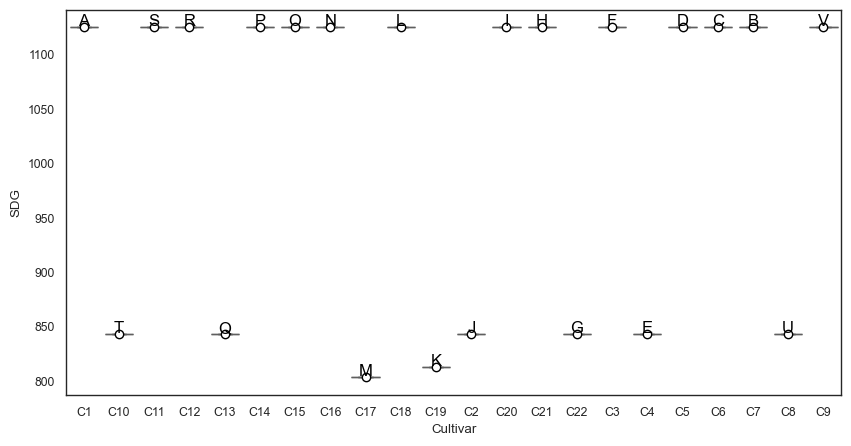

In [108]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=R3, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=R3, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = R3.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(R3['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [109]:
# Coeficiente de Variação (%)
dados = R3.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    14.04
dtype: float64


# R4

In [110]:
R4 = df.loc[df['Estadio'] == 'R4', :]
R4.drop(columns=['Estadio'], inplace=True)

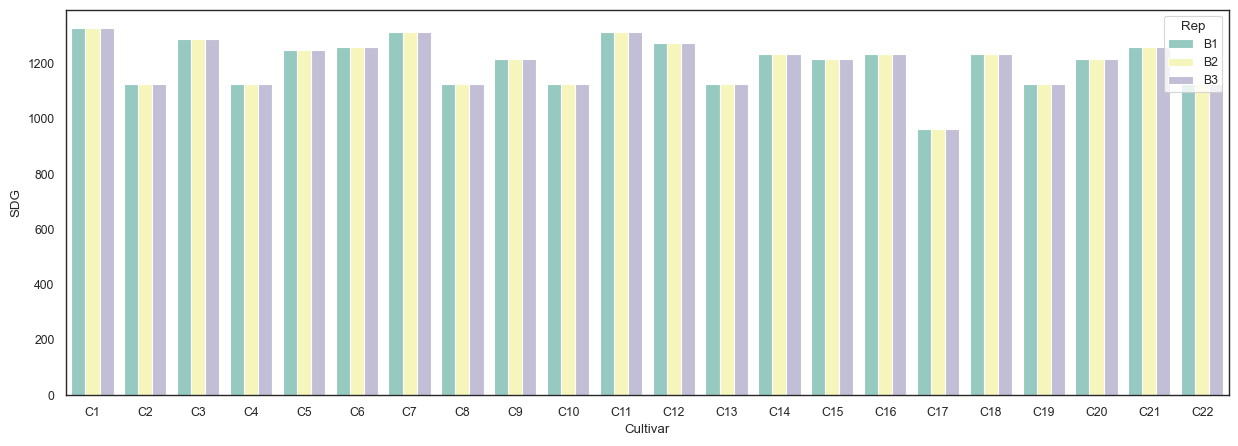

In [111]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=R4, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [112]:
# Normalidade
pg.normality(R4, method="shapiro", alpha=0.05)

W      pval  normal
SDG  0.884754  0.000017   False

In [113]:
# Homocedasticidade
pg.homoscedasticity(R4, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [114]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=R4)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal  Cultivar     21  65.0  0.000002  Rejeitar H0

In [115]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=R4)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1             H  p-unc     decisão
Kruskal    Rep      2 -2.957624e-14    1.0  Aceitar H0

In [116]:
# Realizando média das repetições ("Rep")
R4 = R4.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

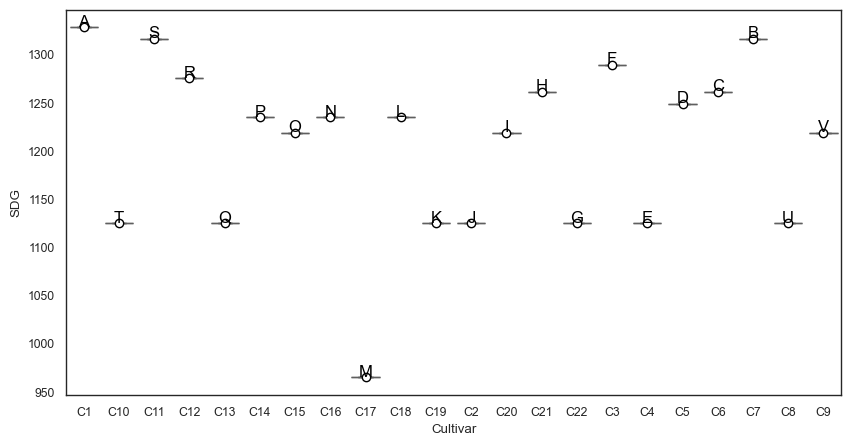

In [117]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=R4, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=R4, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = R4.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(R4['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [118]:
# Coeficiente de Variação (%)
dados = R4.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    7.38
dtype: float64


# R5

In [119]:
R5 = df.loc[df['Estadio'] == 'R5', :]
R5.drop(columns=['Estadio'], inplace=True)

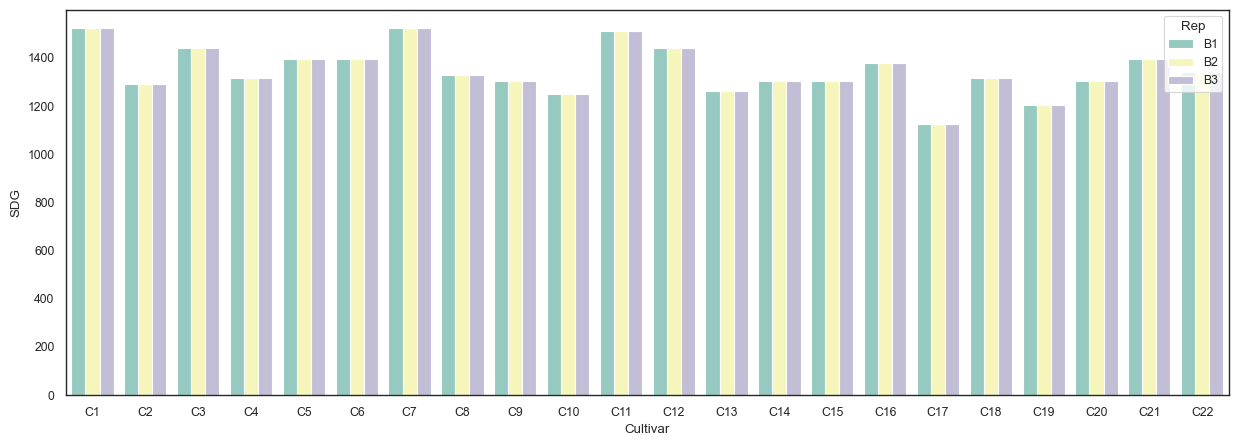

In [120]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=R5, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [121]:
# Normalidade
pg.normality(R5, method="shapiro", alpha=0.05)

W      pval  normal
SDG  0.947586  0.007439   False

In [122]:
# Homocedasticidade
pg.homoscedasticity(R5, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [123]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=R5)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal  Cultivar     21  65.0  0.000002  Rejeitar H0

In [124]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=R5)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1             H  p-unc     decisão
Kruskal    Rep      2 -2.874999e-14    1.0  Aceitar H0

In [125]:
# Realizando média das repetições ("Rep")
R5 = R5.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

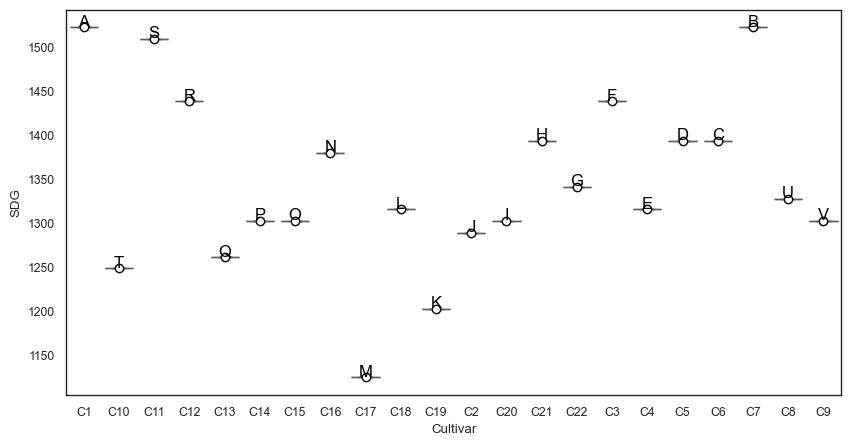

In [126]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=R5, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=R5, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = R5.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(R5['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [127]:
# Coeficiente de Variação (%)
dados = R5.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    7.49
dtype: float64


# R6

In [128]:
R6 = df.loc[df['Estadio'] == 'R6', :]
R6.drop(columns=['Estadio'], inplace=True)

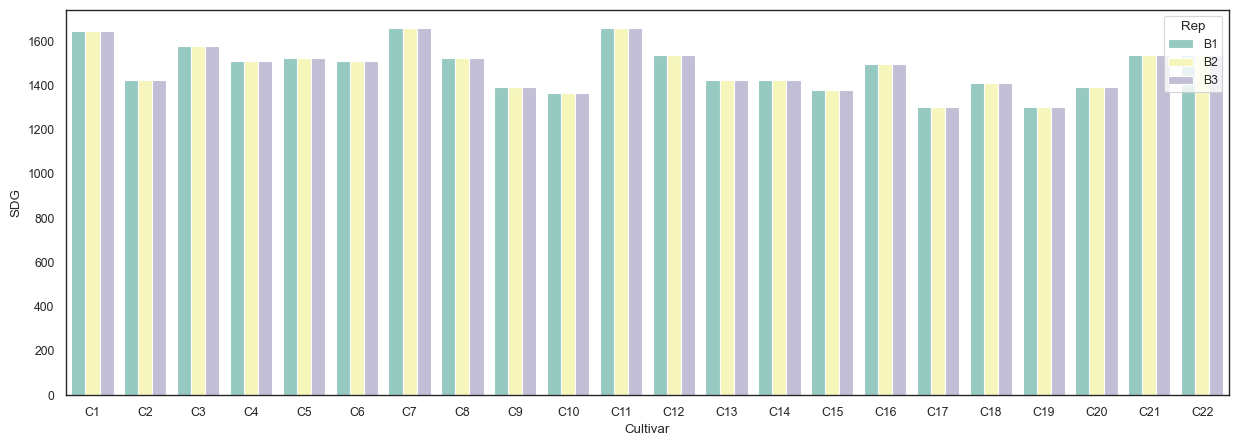

In [129]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=R6, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [130]:
# Normalidade
pg.normality(R6, method="shapiro", alpha=0.05)

W      pval  normal
SDG  0.938033  0.002569   False

In [131]:
# Homocedasticidade
pg.homoscedasticity(R6, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [132]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=R6)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal  Cultivar     21  65.0  0.000002  Rejeitar H0

In [133]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=R6)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1             H  p-unc     decisão
Kruskal    Rep      2 -2.868457e-14    1.0  Aceitar H0

In [134]:
# Realizando média das repetições ("Rep")
R6 = R6.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

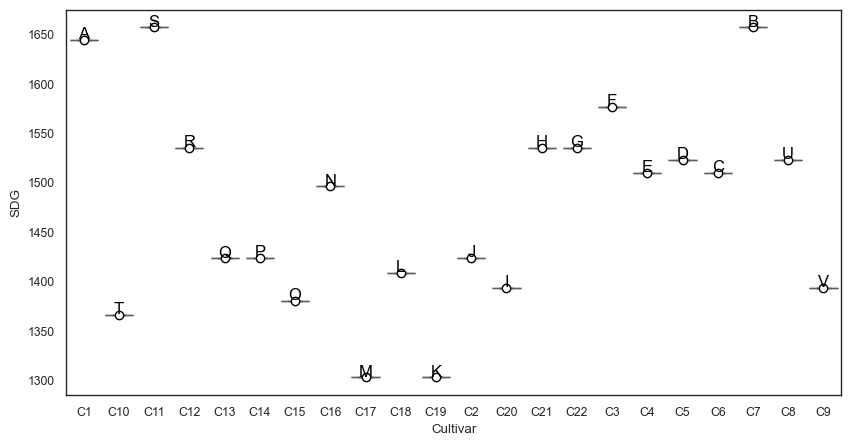

In [135]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=R6, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=R6, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = R6.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(R6['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [136]:
# Coeficiente de Variação (%)
dados = R6.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    7.06
dtype: float64


# R7

In [137]:
R7 = df.loc[df['Estadio'] == 'R7', :]
R7.drop(columns=['Estadio'], inplace=True)

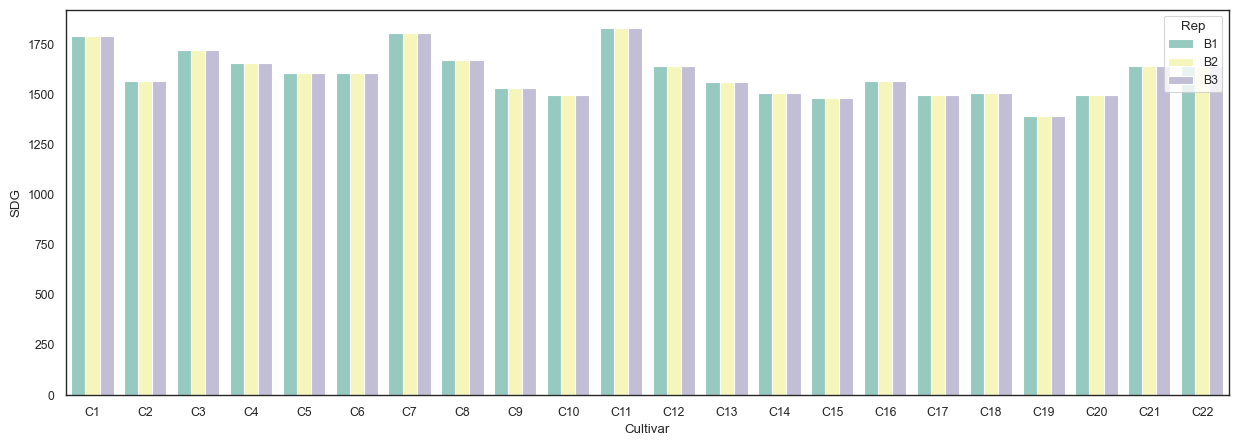

In [138]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=R7, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [139]:
# Normalidade
pg.normality(R7, method="shapiro", alpha=0.05)

W     pval  normal
SDG  0.940759  0.00346   False

In [140]:
# Homocedasticidade
pg.homoscedasticity(R7, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [141]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=R7)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal  Cultivar     21  65.0  0.000002  Rejeitar H0

In [142]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=R7)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1             H  p-unc     decisão
Kruskal    Rep      2 -2.865198e-14    1.0  Aceitar H0

In [143]:
# Realizando média das repetições ("Rep")
R7 = R7.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

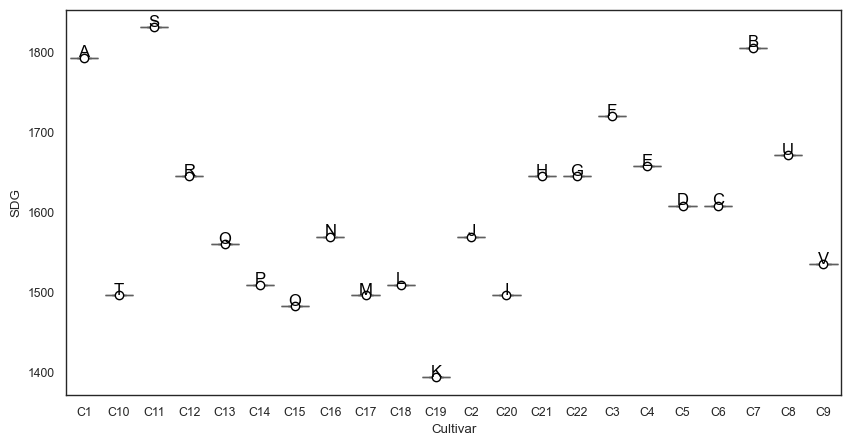

In [144]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=R7, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=R7, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = R7.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(R7['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [145]:
# Coeficiente de Variação (%)
dados = R7.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    7.13
dtype: float64


# R8

In [146]:
R8 = df.loc[df['Estadio'] == 'R8', :]
R8.drop(columns=['Estadio'], inplace=True)

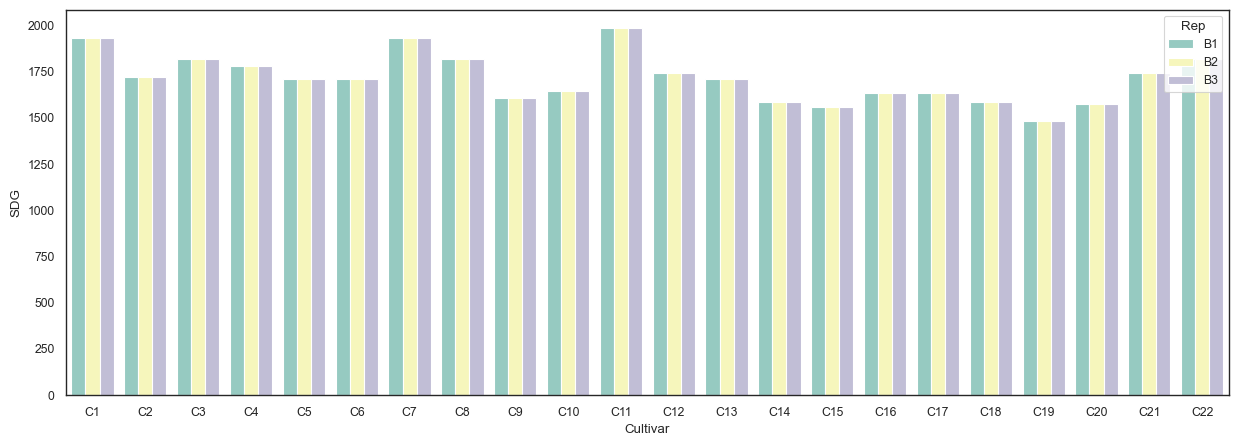

In [147]:
# Grafico
plt.figure(figsize=(15, 5))
sns.barplot(data=R8, x='Cultivar', y='SDG', palette='Set3', hue="Rep");

In [148]:
# Normalidade
pg.normality(R8, method="shapiro", alpha=0.05)

W      pval  normal
SDG  0.951889  0.012235   False

In [149]:
# Homocedasticidade
pg.homoscedasticity(R8, method="levene", alpha=0.05, group="Cultivar", dv='SDG')

W  pval  equal_var
levene NaN   NaN      False

In [150]:
resultado = pg.kruskal(dv='SDG', between="Cultivar", data=R8)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1     H     p-unc      decisão
Kruskal  Cultivar     21  65.0  0.000002  Rejeitar H0

In [151]:
resultado = pg.kruskal(dv='SDG', between="Rep", data=R8)
resultado['decisão'] = resultado['p-unc'].apply(lambda x: "Rejeitar H0" if x < 0.05 else "Aceitar H0")
resultado

Source  ddof1             H  p-unc     decisão
Kruskal    Rep      2 -2.866827e-14    1.0  Aceitar H0

In [152]:
# Realizando média das repetições ("Rep")
R8 = R8.groupby(['Cultivar']).mean(numeric_only=True).reset_index()

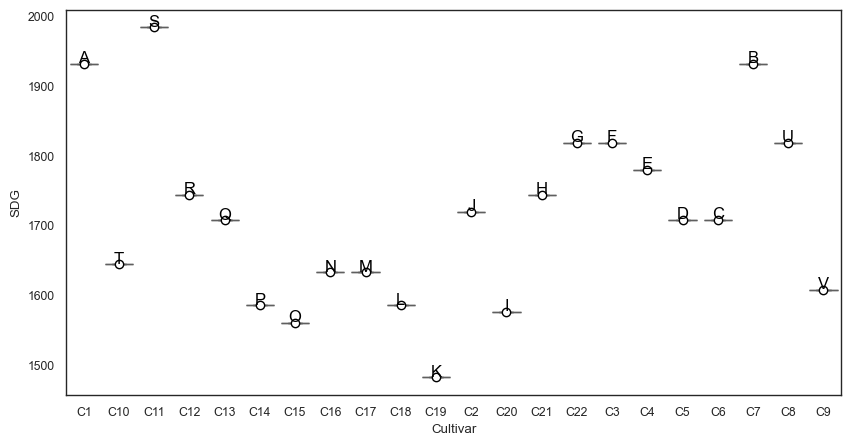

In [153]:
# Post-Hoc (Games-Howell)
pt = pg.pairwise_gameshowell(data=R8, dv='SDG', between='Cultivar')
resultado = ltukey(df=pt, CI=95)

# Create a dictionary to map each Rep to its group
group_dict = dict(zip(resultado[0], resultado['groups']))

# Plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=R8, x='Cultivar', y='SDG', palette='Set3', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Annotate the boxplot with the groups
positions = R8.groupby('Cultivar')['SDG'].max().values
for i, rep in enumerate(R8['Cultivar'].unique()):
    group = group_dict.get(rep, "")
    plt.text(i, positions[i] + 1, group, fontsize=12, color='black', ha='center')

plt.show()

In [154]:
# Coeficiente de Variação (%)
dados = R8.describe()
dados_media = dados.loc['mean']
dados_desvpad = dados.loc['std']
dados_CV = (dados_desvpad/dados_media)*100
print(round(dados_CV,2))

SDG    7.69
dtype: float64


# CONCLUSÃO